# **Modeling Data Using a Graph.**

In this example we explore using NetworkX to build graphs based on related data. Below are some examples that illustrate how to build a graph using this package.

Run these examples and confirm that you have NetworkX correctly installed. Then complete questions 1 - 4 below.

It is recommended that you upload and run this notebook on [Colab](https://colab.research.google.com/)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

In [3]:
# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}


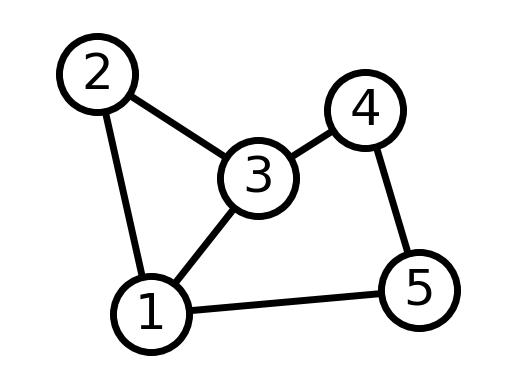

In [4]:
nx.draw_networkx(G, pos, **options)
# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

# Now try building a directed Graph

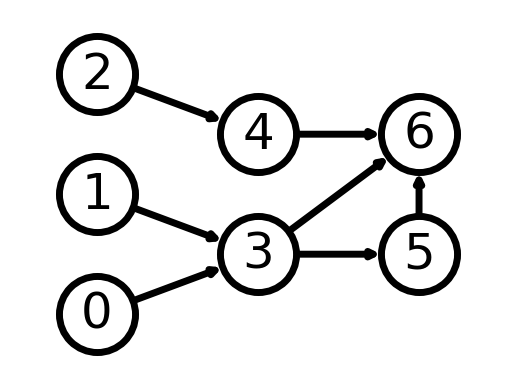

In [5]:
G = nx.DiGraph([(0, 3), (1, 3), (2, 4), (3, 5), (3, 6), (4, 6), (5, 6)])

# group nodes by column
left_nodes = [0, 1, 2]
middle_nodes = [3, 4]
right_nodes = [5, 6]

# set the position according to column (x-coord)
pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (1, i + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

**Modeling Twitter Network.**

In this exercise we will model and analyze example X (Twitter )social network data. Assume we have information about a small network of Twitter users -- specifically who each user "follows". Thus we are modeling the "follows" relation using a graph.

Using the following data table below complete the stated questions.


- Dan follows Jane, Bob, Sally, Sam, Tiana, Juan, and Wei
- Wei follows Dan, Bob, and Sam
- Bob follows Jane, Wei, and Tiana
- Tiana follows Jane and Juan
- Sally follows Bob
- Jane follows Juan and Wei
- Juan follows Sally and Jane
- Sam follows Jane

NOTE: If you have any questions about syntax or function names, search the docs. There is a search bar in the upper right of this page:

https://networkx.org/documentation/stable/reference/index.html







## Question 1.

Would you use a undirected graph or a directed graph to model this data? Explain.

**Because the data we are modeling is based on "following", and some follows are one-way (e.g. Sally follows Bob but Bob does not follow Sally), it makes the most sense for the model's graph to be directed.**

## Question 2.

Create this graph using NetworkX and plot the resulting graph.

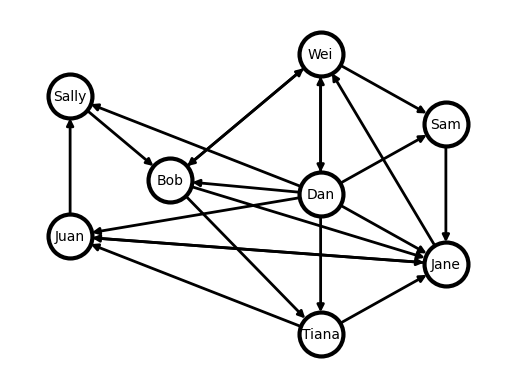

In [6]:
G = nx.DiGraph([("Dan", "Jane"),("Dan", "Bob"),("Dan", "Sally"),("Dan", "Sam"),("Dan", "Tiana"),("Dan", "Juan"),("Dan", "Wei"),
                ("Wei", "Dan"),("Wei", "Bob"),("Wei", "Sam"),
                ("Bob", "Jane"),("Bob", "Wei"),("Bob", "Tiana"),
                ("Tiana", "Jane"),("Tiana", "Juan"),
                ("Sally", "Bob"),
                ("Jane", "Juan"),("Jane", "Wei"),
                ("Juan", "Sally"),("Juan", "Jane"),
                ("Sam", "Jane")])

left_nodes = ["Juan", "Sally"]
middle_left_nodes = ["Bob"]
middle_right_nodes = ["Tiana", "Dan", "Wei"]
right_nodes = ["Jane", "Sam"]

pos = {n: (0, i + 0.7) for i, n in enumerate(left_nodes)}
pos.update({n: (0.8, i + 1.1) for i, n in enumerate(middle_left_nodes)})
pos.update({n: (2, i) for i, n in enumerate(middle_right_nodes)})
pos.update({n: (3, i + 0.5) for i, n in enumerate(right_nodes)})

options = {
    "font_size": 10,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 3,
    "width": 2,
}

nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()

## Question 3.

Assume you wanted to determine which user was the biggest "social influencer". Which graph measure would you compute and why?

**Given that our data is examining social media following, determining which user has the biggest influence means determining who has the most followers. Therefore the best measure to compute is degree centrality (specifically in-degree centrality, since we're not looking at who is following the most people), as the user with the highest degre centrality will be the one the most people are connected to through the fewest intermediaries, and thus the one with most direct followers. Betweenness centrality would not be as effective a measure, as that also takes into account shortest paths with the user as a midde node; this is useful for measuring who is most integral for the group's overall connection, but not who individually has the most clout.**

## Question 4.

Compute the measure chosen and determine who in this example was the biggest social influencer. See example below which analyzes facebook social network data. You will need to have data file facebook_combined.txt to complete this example.

In [7]:
# Read in graph data from facebook data txt file.
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)
print(G_fb)

Graph with 4039 nodes and 88234 edges


(-0.798352721631527,
 1.1708841952681541,
 -0.8232646310329438,
 0.5276993834972382)

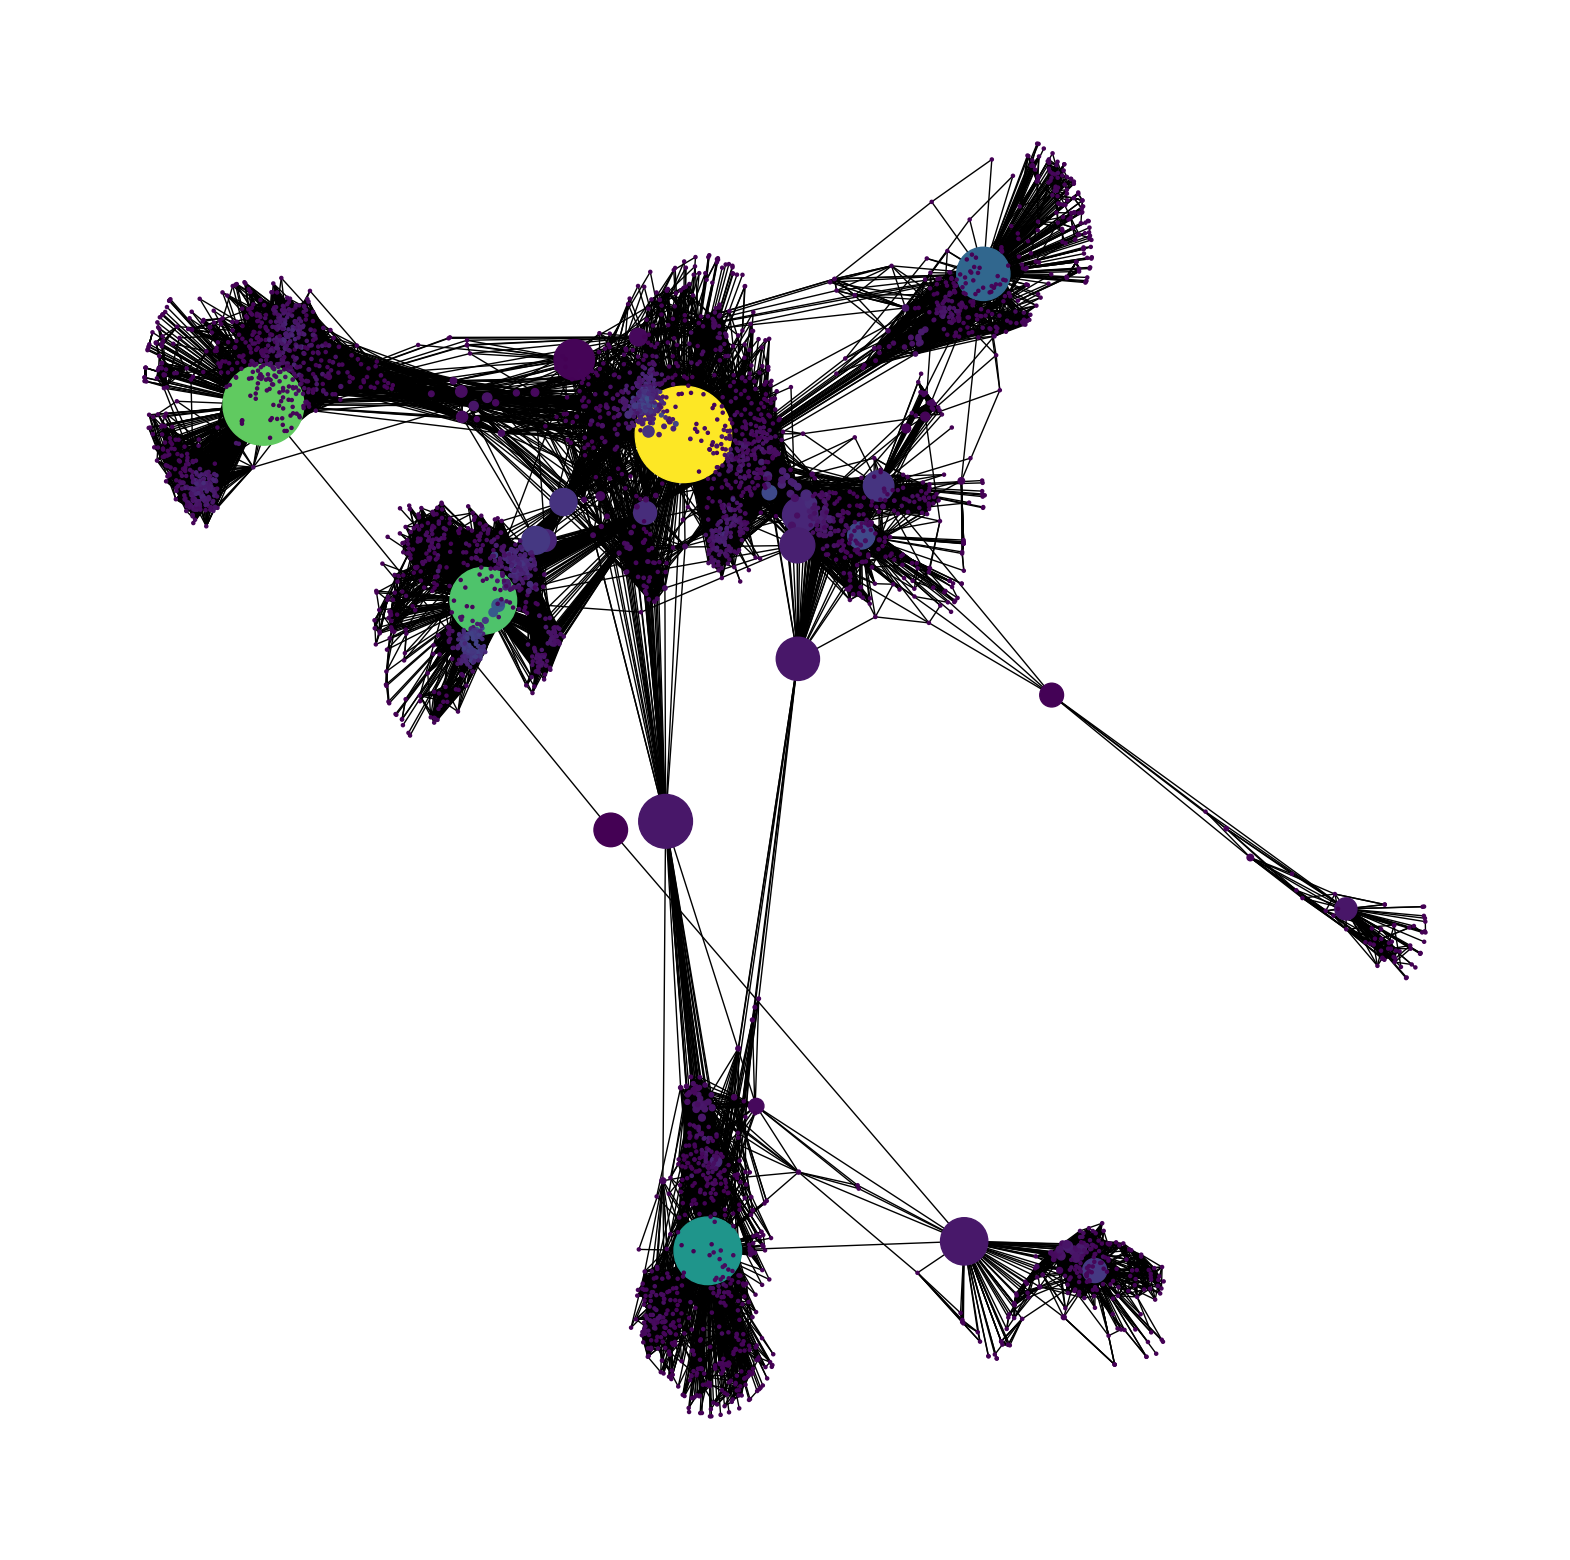

In [8]:
# Compute measures of centrality and degree for the nodes. These attributes can
# be used to help analyze the graph. Then the graph is plotted and color and size
# of the nodes are used to indicate size and betweeness, respectively. (Note: This
# is a large data set and may take 5+ minutes to run.)

pos_fb = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos_fb, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

Nodes with the highest betweeness

In [9]:
# Identify the top 5 nodes with highest betweeness measures.
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]

['Jane', 'Bob', 'Juan', 'Wei', 'Sally']

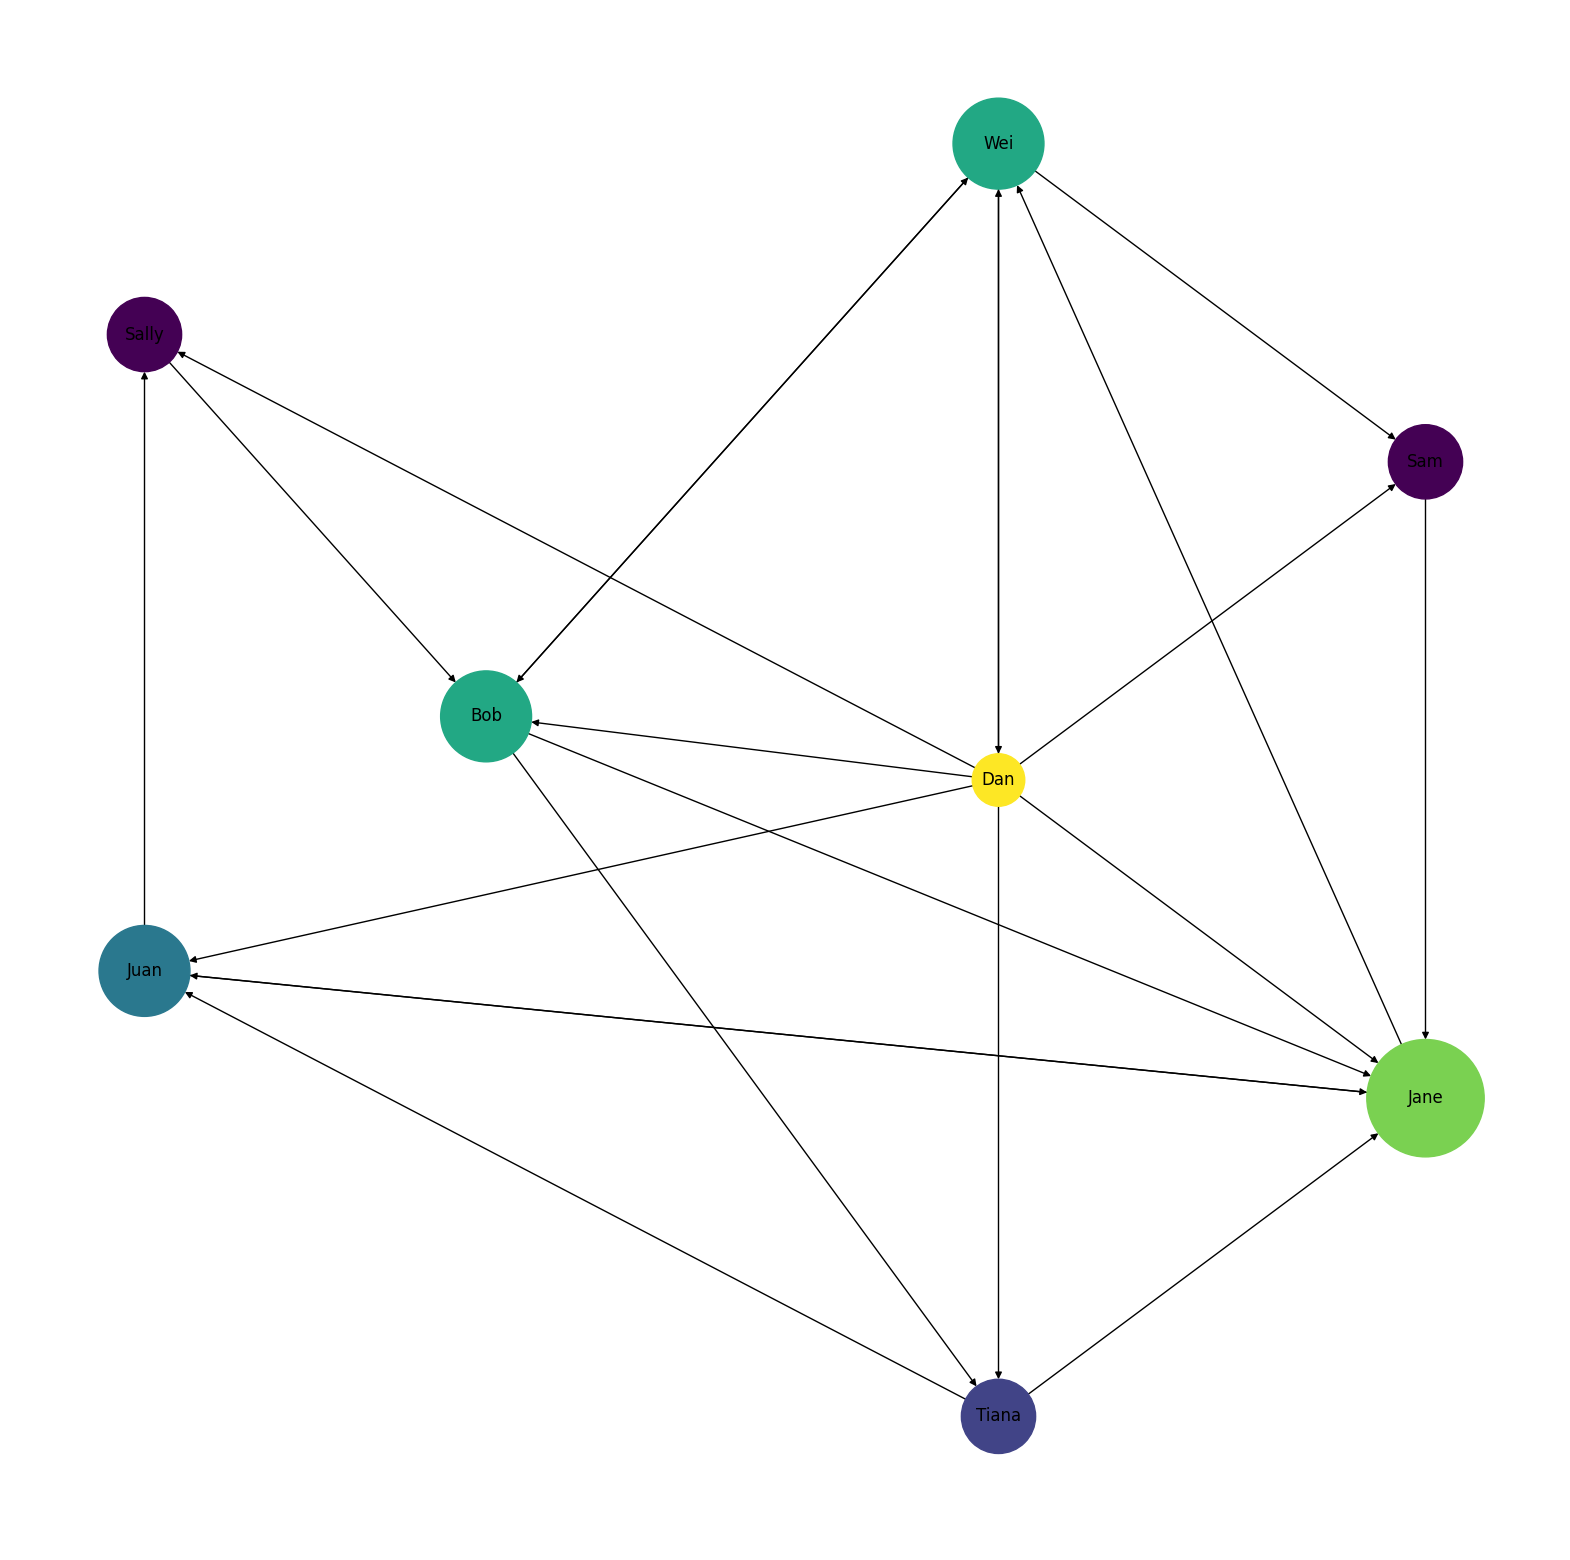

In [18]:
degCent = nx.in_degree_centrality(G)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in degCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos,
                 node_color=node_color,
                 node_size=node_size)
plt.axis('off')

sorted(degCent, key=degCent.get, reverse=True)[:5]

**The user with the most direct followers, and therefore the biggest social influencer, is Jane.**